In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
from pathlib import Path

In [70]:
#askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
#path = Path(askdirectory)

In [115]:
variable = '[DCX]'
units = r'$(nM)$'
units

'$(nM)$'

In [116]:
date = ['2019-10-09','2019-10-23']
jointdate = '_'.join(date)
micscp = 'DIC' #TIRF or DIC
paths = []

for i in date :
    p = 'E:\\Sofia\\'+i+'_'+micscp
    path = Path(p)
    paths = paths+[path]
    print(path.exists())

paths

True
True


[WindowsPath('E:/Sofia/2019-10-09_DIC'),
 WindowsPath('E:/Sofia/2019-10-23_DIC')]

In [108]:
# variable = '[Tubulin]'
# units = r'$(\mu M)$'
# date = ['2019-06-10','2019-06-12','2019-06-13','2019-07-03','2019-07-04','2019-07-04_1']
# jointdate = '_'.join(date)
# micscp = 'DIC' #TIRF or DIC
# paths = []

# for i in date :
#     p = 'E:\\Sofia\\2019_summer_dynamics_control\\'+i+'_'+micscp
#     path = Path(p)
#     paths = paths+[path]
#     print(path.exists())

# paths

True
True
True
True
True
True


[WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-10_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-12_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-13_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-03_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_1_DIC')]

In [117]:
data = pd.read_csv(paths[0]/(date[0]+'_data.csv'),sep=',',index_col=0);
for i in np.arange(1,len(date)):
    df = pd.read_csv(paths[i]/(date[i]+'_data.csv'),sep=',',index_col=0);
    data = data.append(df)
data = data.sort_values(by=[variable])
data.to_csv(path.parents[0]/('joint_means_'+jointdate+'.csv'), encoding='utf-8', index=True)
data

,[DCX],growth mean,growth std,time2nuc mean,time2nuc std,lifetime mean,lifetime std,shrinkage mean,shrinkage std
11,0.0,0.296210,0.097773,16.741374,12.696243,2.898214,2.052806,6.687044,3.645460
21,25.0,0.637637,0.100151,4.254667,5.653593,7.084667,4.832560,2.366684,1.070563
12,50.0,0.849927,0.151463,0.707962,1.476633,4.533019,3.080758,3.797133,2.416843
23,50.0,1.302901,0.133748,0.522593,0.307557,13.557185,5.704018,4.157553,1.902989
22,100.0,0.856184,0.104682,0.518532,0.609283,14.248929,6.848906,2.276207,0.985084


In [118]:
a = np.unique(data[variable].values)
tub_concs = np.char.mod('%d', a)
tub_concs = tub_concs.astype(float)
name = ['growth','time2nuc','lifetime','shrinkage']
tub_concs

array([  0.,  25.,  50., 100.])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

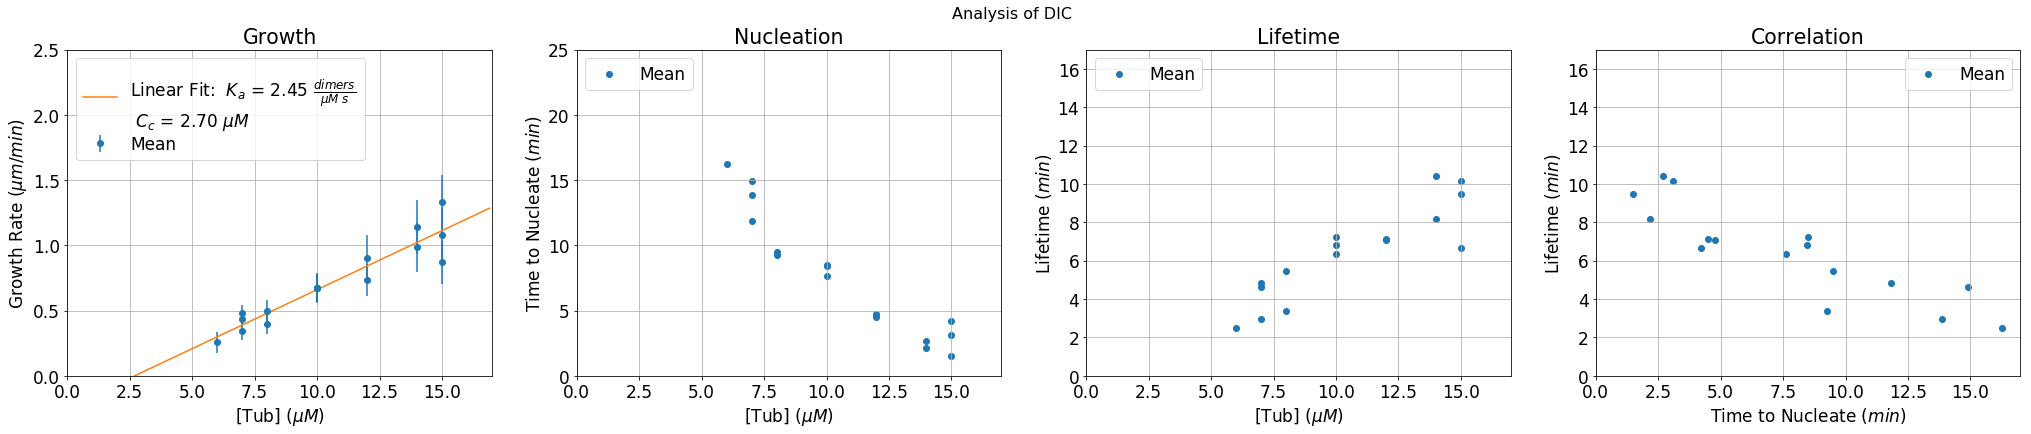

In [80]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}
plt.rc('font', **font)

titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Lifetime ' r'$(min)$')

a1 , a0 = np.polyfit(data[variable], data['growth mean'], 1)
y_int = -a0/a1
x_range = np.arange(0,17,0.1)

plt.figure(figsize=(35,6))
plt.suptitle('Analysis of '+micscp, fontsize=16)
 
plt.subplot(1,4,1)
plt.errorbar(data[variable], data['growth mean'], yerr=data['growth std'], fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,2.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$'' \n 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Mean'),loc='upper left')

plt.subplot(1,4,2)
plt.scatter(data[variable], data['time2nuc mean'])
#plt.scatter(data['tub conc'], data['time2nuc std'])
plt.ylim(0,25)
plt.legend(( 'Mean',r'$\sigma$'),loc='upper left')

plt.subplot(1,4,3)
plt.scatter(data[variable], data['lifetime mean'])
#plt.scatter(data['tub conc'], data['lifetime std'])
plt.ylim(0,17)
plt.legend(('Mean', r'$\sigma$'),loc='upper left')

plt.subplot(1,4,4)
plt.scatter(data['time2nuc mean'], data['lifetime mean'])
plt.ylim(0,17)
plt.legend(('Mean', r'$\sigma$'),loc='upper right')


for i in [0,1,2,3] :
    plt.subplot(1,4,i+1)
    plt.xlabel('[Tub] ' r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,17)
    plt.grid(True)
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.xlim(0,17)
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.pdf'))
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.png'))

In [81]:
def save_jointraw(date,name):
    
    df = pd.DataFrame([],columns=[])

    for i in np.arange(len(date)):
        df2 = pd.read_csv(paths[i]/(date[i]+'_'+name+'.csv'),sep=',');
        df2.columns = df2.columns.astype(float);
        df= pd.concat([df,df2],sort=False)

    df = df.reindex(sorted(df.columns), axis=1)

    df.to_csv(path.parents[0]/('joint_'+name+'_'+jointdate+'.csv'), encoding='utf-8', index=False)

In [83]:
for j in np.arange(len(name)):
    save_jointraw(date,name[j])

# Fitting Data #

In [86]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))

dataG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dataN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dataC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');
#dataS = pd.read_csv(path.parents[0]/('joint_'+name[3]+'_'+jointdate+'.csv'),sep=',');

In [87]:
def variable_values(data):
    r = {variable:np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):

#======Making a data frame========
        r = {variable:[float(i),float(i)]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results


def gaussian_fit(data, mu_name,sigma_name,maxbin,binsize):
    r = {mu_name:np.empty(0) ,sigma_name:np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, maxbin + binsize, binsize), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gaussian,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {mu_name:[coeff[0],SE[0]],sigma_name:[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def exponential_fit(data):
    r = {'scale e':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(exponential,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'scale e':[coeff[0],SE[0]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def gamma_fit(data):
    r = {'shape':np.empty(0) ,'scale g':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gamma,bins[:-1],n,[2,1])
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'shape':[coeff[0],SE[0]],'scale g':[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

In [94]:
#fitdata = pd.concat([variable_values(dataG),gaussian_fit(dataG,'mu','sigma',3 , 0.05), exponential_fit(dataN),gamma_fit(dataC),gaussian_fit(dataS,'muS','sigmaS',15 , 0.1)], axis=1, sort=False)
fitdata = pd.concat([variable_values(dataG),gaussian_fit(dataG,'mu','sigma',3 , 0.05), exponential_fit(dataN),gamma_fit(dataC),gaussian_fit(dataG,'muS','sigmaS',15 , 0.1)], axis=1, sort=False)
fitdata.to_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8', index=True)
fitdata


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


,[Tubulin],mu,sigma,scale e,shape,scale g,muS,sigmaS
Value,6.0,0.227259,0.071685,18.337077,2.730947,0.660401,0.219618,0.068130
SE,6.0,0.005694,0.004649,2.404383,0.108280,0.031368,0.000947,0.000699
Value,7.0,0.399025,0.084541,14.669497,2.095318,1.566615,0.375305,0.085400
SE,7.0,0.001910,0.001560,0.871132,0.083179,0.079370,0.000975,0.000795
Value,8.0,0.414874,0.094281,8.325730,1.852167,2.106073,0.388153,0.097310
SE,8.0,0.002509,0.002049,0.384930,0.069939,0.104784,0.001318,0.001068
Value,10.0,0.658315,0.106446,6.508629,1.353430,4.730775,0.631360,0.110440
SE,10.0,0.002203,0.001799,0.320732,0.057470,0.293048,0.001152,0.000941
Value,12.0,0.781291,0.162291,3.641660,1.350230,4.963464,0.759142,0.165935
SE,12.0,0.003924,0.003204,0.193811,0.073067,0.393718,0.001017,0.000831


<Figure size 432x288 with 0 Axes>

#  PLOT DATA  #

In [126]:
name = ['growth','time2nuc','lifetime','shrinkage']

fitdata = pd.read_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8',index_col=0)
dataG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dataN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dataC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');
dataS = pd.read_csv(path.parents[0]/('joint_'+name[3]+'_'+jointdate+'.csv'),sep=',');
#dataS = dataG
font = {'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
#plt.rcParams['font.family'] ='Helvetica Neue Lt Std'

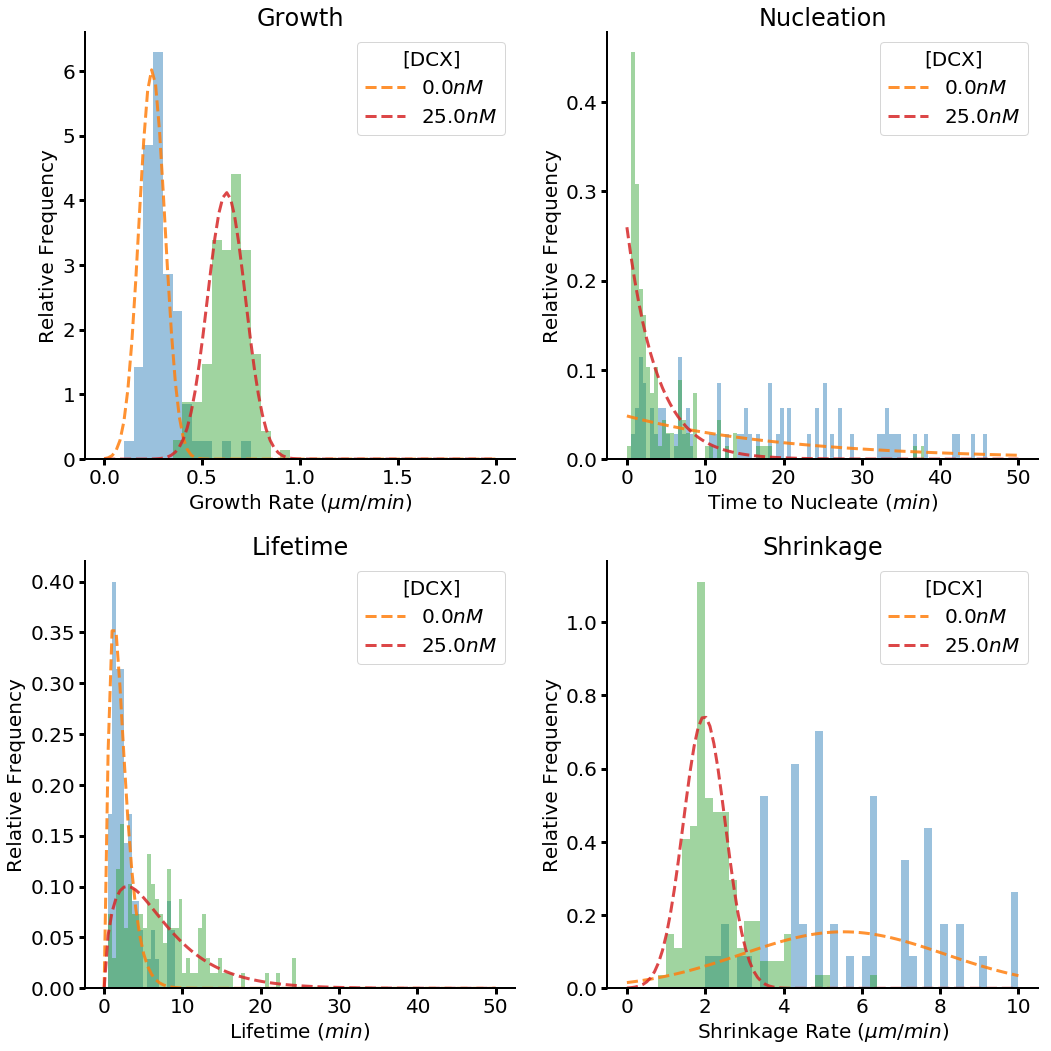

In [127]:
legnd = []

titles = ('Growth','Nucleation','Lifetime','Shrinkage')
xlables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Shrinkage Rate ' r'$(\mu m / min)$')

fig, axs = plt.subplots(2,2,figsize=(15,15))
#fig.suptitle('Pooled data', fontsize=18)

for i in ['0.0','25.0']:#tub_concs:#['6']:#list(data):
    
    datos = dataG[i].dropna()
    mu0 = fitdata.loc[fitdata[variable] == float(i)]['mu']['Value']
    sigma0 = fitdata.loc[fitdata[variable] == float(i)]['sigma']['Value']
    n, bins, patches = axs[0][0].hist(datos, bins=np.arange(0, 2 + 0.05, 0.05), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[0][0].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    
    datos = dataN[i].dropna()
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale e']['Value']
    n, bins, patches = axs[0][1].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[0][1].plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=3, alpha=0.85)
    
    datos = dataC[i].dropna()
    shape0 = fitdata.loc[fitdata[variable] == float(i)]['shape']['Value']
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale g']['Value']
    n, bins, patches = axs[1][0].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[1][0].plot(x, sp.stats.gamma.pdf(x, shape0, 0 , scale0),'--', lw=3, alpha=0.85)
    
    datos = dataS[i].dropna()
    mu0 = fitdata.loc[fitdata[variable] == float(i)]['muS']['Value']
    sigma0 = fitdata.loc[fitdata[variable] == float(i)]['sigmaS']['Value']
    n, bins, patches = axs[1][1].hist(datos, bins=np.arange(0, 10 + 0.2, 0.2), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[1][1].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    
    legnd = legnd + [i+r'$nM$']#, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]

count = 0 
for i in np.arange(len(axs)):
    for j in np.arange(len(axs)):
        axs[i][j].set_ylabel('Relative Frequency')
        axs[i][j].set_xlabel(xlables[count])
        axs[i][j].set_title(titles[count]);
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].spines['top'].set_visible(False)
        axs[i][j].spines['left'].set_lw(2)
        axs[i][j].spines['bottom'].set_lw(2)
        axs[i][j].tick_params(axis='both', width = 3, length = 6)
        axs[i][j].legend(legnd,loc='upper right',title=variable)
        count += 1

#plt.savefig(path.parents[0]/('joint_histogramsfit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('POSTERjoint_histogramsfit_'+jointdate+'.pdf'))
plt.tight_layout()
plt.show()

In [128]:
conc = fitdata[variable]['Value'].values
gamma_mu = np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['Value'].values)
gamma_muSE = np.add(np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['SE'].values),np.multiply(fitdata['scale g']['SE'].values,fitdata['shape']['Value'].values))

def linear_fit(x, a0, a1):
    return a0 + x*a1

coeffG, var_matrixG = sp.optimize.curve_fit(linear_fit,conc, fitdata['mu']['Value'].values)
varianceG = np.diagonal(var_matrixG) #Refer [3]
SEG = np.sqrt(varianceG) #Refer [4]

a0 = coeffG[0]
a1 = coeffG[1]
y_int = -a0/a1
y_int_SE = y_int*(abs(SEG[0]/a0)+abs(SEG[1]/a1))


coeffL, var_matrixL = sp.optimize.curve_fit(linear_fit,conc, gamma_mu)
varianceL = np.diagonal(var_matrixL) #Refer [3]
SEL = np.sqrt(varianceL) #Refer [4]

A0 = coeffL[0]
A1 = coeffL[1]
Y_int = -A0/A1
Y_int_SE = Y_int*(abs(SEL[0]/A0)+abs(SEL[1]/A1))

def exponential_nonorm(x, y0, a, k):
    return ((np.exp(-(x)*k) )*a+y0)

coeff, var_matrix = sp.optimize.curve_fit(exponential_nonorm,conc, fitdata['scale e']['Value'].values)
        
variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance) #Refer [4]

#coeffC, var_matrixC = sp.optimize.curve_fit(exponential_nonorm,gamma_mu,fitdata['scale e']['Value'].values)
        
# varianceC = np.diagonal(var_matrix) #Refer [3]
# SEC = np.sqrt(variance) #Refer [4]

x_range = np.arange(0,107,0.1)

In [129]:
gamma_muSE
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'

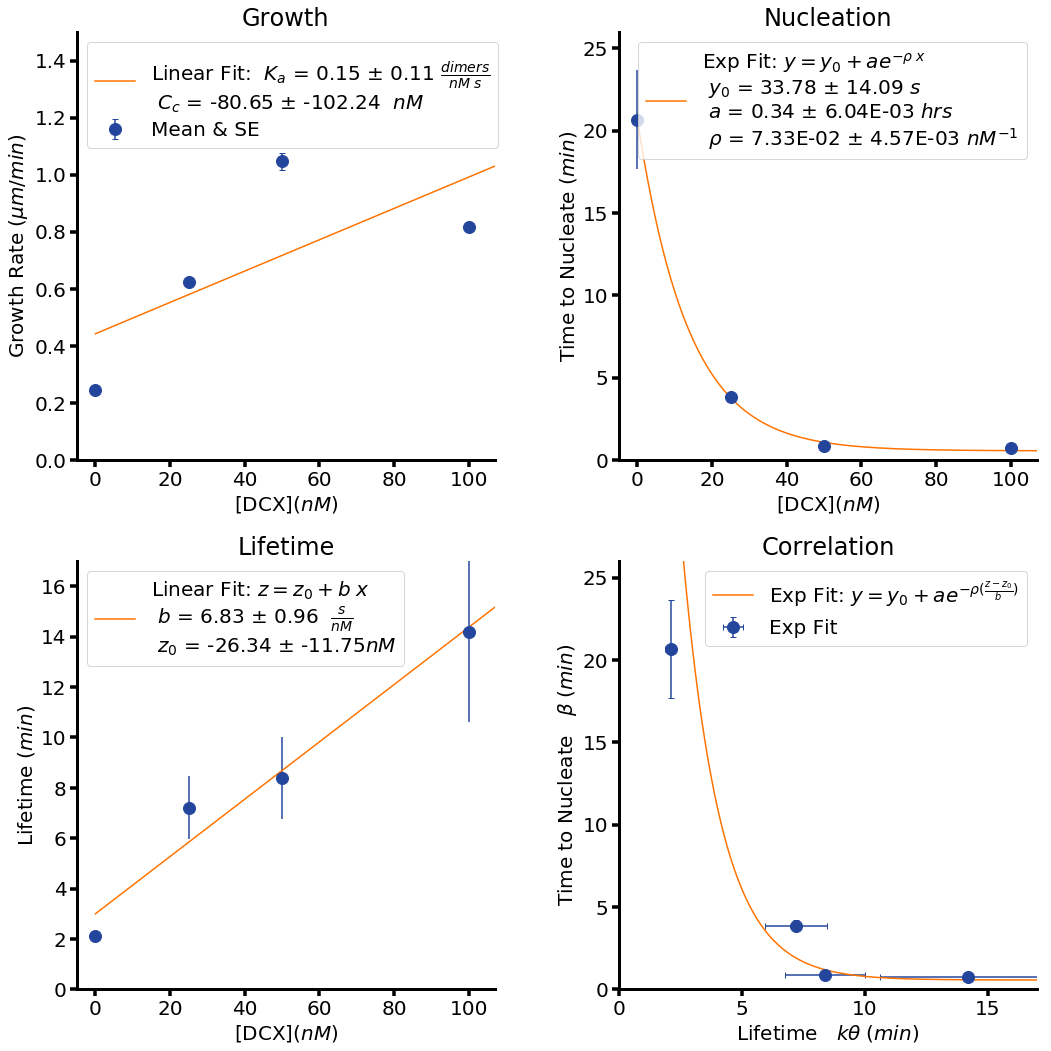

In [132]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate   ' r'$\beta \; (min)$')

ylim = 26
scattersize = 12

fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.suptitle('Fitted pooled data', fontsize=30)


ax[0][0].errorbar(fitdata[variable]['Value'], fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][0].plot(x_range, a1*x_range+a0,color=orange)
ax[0][0].set_ylim(0,1.5)
ax[0][0].legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\pm$'' %.2f 'r'$\frac{dimers}{n M \; s}$''\n 'r'$C_c$'' = %.2f 'r'$\pm$'' %.2f  'r'$n M$' %(a1*27.1,SEG[1]*27.1, y_int,y_int_SE),'Mean & SE'),loc='upper left')


ax[0][1].errorbar(conc, fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,color=blue)
ax[0][1].plot(x_range, exponential_nonorm(x_range, coeff[0],coeff[1],coeff[2]),color=orange)
ax[0][1].set_ylim(0,ylim)
ax[0][1].legend(['Exp Fit: 'r'$y = y_0+a e^{-\rho \; x}$' '\n 'r'$y_0$'' = %.2f 'r'$\pm$'' %.2f 'r'$s$''\n 'r'$a$'' = %.2f 'r'$\pm$'' %.2E 'r'$hrs$''\n 'r'$\rho$'' = %.2E 'r'$\pm$'' %.2E 'r'$nM ^{-1}$' %(coeff[0]*60,SE[0]*60,coeff[1]/60,SE[1]/60,coeff[2],SE[2])],loc='upper right')


ax[1][0].errorbar(conc, gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize,color=blue)
ax[1][0].plot(x_range, A1*x_range+A0,color=orange)
ax[1][0].set_ylim(0,17)
ax[1][0].legend(['Linear Fit: 'r'$z = z_0 + b \; x$' '\n 'r'$b$'' = %.2f 'r'$\pm$'' %.2f  'r'$\frac{s}{n M}$''\n 'r'$z_0$'' = %.2f 'r'$\pm$'' %.2f' r'$n M$' %(A1*60,SEL[1]*60, Y_int,Y_int_SE)],loc='upper left')


ax[1][1].errorbar( gamma_mu,fitdata['scale e']['Value'].values, xerr=gamma_muSE , yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = blue)
ax[1][1].plot(x_range, exponential_nonorm((x_range-A0)/A1, coeff[0],coeff[1],coeff[2]),color=orange)
#ax[1][1].plot(x_range, exponential_nonorm(x_range, coeffC[0],coeffC[1],coeffC[2]),color=green)
ax[1][1].set_ylim(0,ylim)
ax[1][1].legend(('Exp Fit: 'r'$y = y_0+a e^{- \rho (\frac{z-z_0}{b})}$','Exp Fit'),loc='upper right')

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlabel(variable + units)
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].set_title(titles[count]);
        ax[i][j].set_xlim(-5,107)
        #ax[i][j].set_xlim(0,17)
        #ax[i][j].set_xticks(np.arange(0, 17, 2))
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        count += 1

ax[1][1].set_xlabel('Lifetime   ' r'$k \theta \; (min)$') 
ax[1][1].set_xlim(0,17)
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.pdf'))
plt.tight_layout()

In [101]:
data = pd.read_csv(paths[0]/(date[0]+'_no_nuc.csv'),sep=',',index_col=False);
for i in np.arange(1,len(date)):
    df = pd.read_csv(paths[i]/(date[i]+'_no_nuc.csv'),sep=',',index_col=False);
    data = data.append(df)
data = data.sort_values(by=[variable])
data.to_csv(path.parents[0]/('joint_no_nuc_'+jointdate+'.csv'), encoding='utf-8', index=True)
data

,[Tubulin],No Nuc,Total Seeds,Percent No Nuc
0,6,17,70,24.285714
0,7,22,113,19.469027
1,7,1,112,0.892857
0,7,4,109,3.669725
0,8,17,132,12.878788
0,8,7,150,4.666667
1,10,3,141,2.127660
0,10,5,175,2.857143
1,10,4,184,2.173913
2,12,3,193,1.554404


In [102]:
data_rescue = pd.read_csv(paths[0]/(date[0]+'_rescue.csv'),sep=',',index_col=False);
for i in np.arange(1,len(date)):
    df = pd.read_csv(paths[i]/(date[i]+'_rescue.csv'),sep=',',index_col=False);
    data_rescue = data_rescue.append(df)
data_rescue = data_rescue.sort_values(by=[variable])
data_rescue.to_csv(path.parents[0]/('joint_no_nuc_'+jointdate+'.csv'), encoding='utf-8', index=True)
data_rescue

FileNotFoundError: [Errno 2] File b'E:\\Sofia\\2019_summer_dynamics_control\\2019-06-10_DIC\\2019-06-10_rescue.csv' does not exist: b'E:\\Sofia\\2019_summer_dynamics_control\\2019-06-10_DIC\\2019-06-10_rescue.csv'

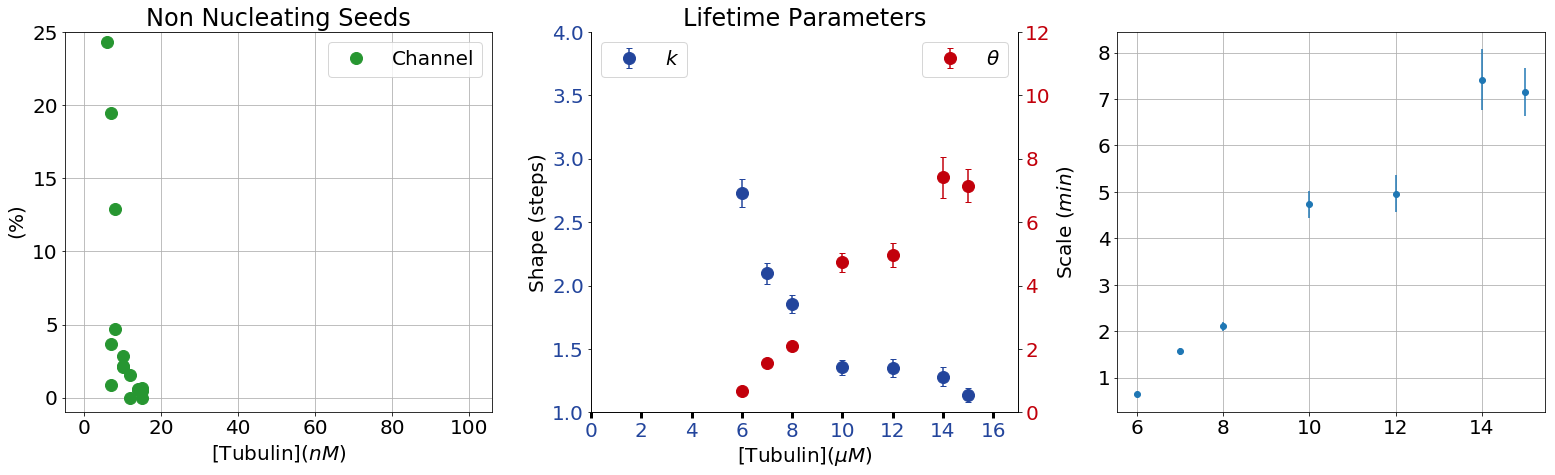

In [113]:
#plt.suptitle('Analysis of '+micscp+' joint data', fontsize=16)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(22,7))
#ax1.subplot(1,3,1)
ax1.errorbar(data[variable],data['Percent No Nuc'], fmt='o', c= '#279631', markersize=scattersize)
ax1.set_xlabel(variable + r'$(n M)$')
ax1.set_ylabel( r'$(\%)$')
ax1.set_title('Non Nucleating Seeds');
ax1.set_xlim(-5,106)
ax1.set_ylim(-1,25)
ax1.legend(['Channel'],loc='upper right')
ax1.grid(True)

#ax2.subplot(1,3,2)
#color = '#236A8E'
ax2.errorbar(fitdata[variable]['Value'],fitdata['shape']['Value'],yerr=fitdata['shape']['SE'], fmt='o',c=blue,markersize=12,capsize = 3)
ax2.set_xlabel(variable + r'$(\mu M)$')
ax2.set_ylabel('Shape (steps)')
ax2.set_title('Lifetime Parameters');
ax2.set_ylim(1,4)
ax2.set_xlim(0,17)
ax2.set_xticks(np.arange(0, 17, 2))
ax2.tick_params(axis='x', width = 3, length = 6 , labelcolor= blue)
ax2.tick_params(axis='both')
ax2.legend([r'$k$'],loc='upper left')
ax2.tick_params(axis='y', labelcolor= blue)
ax2.spines['top'].set_visible(False)
#ax2.grid(True)

ax4 = ax2.twinx() 
color = '#C2000B'
ax4.set_ylabel('Scale 'r'$(min)$')  # we already handled the x-label with ax1
ax4.errorbar(fitdata[variable]['Value'],fitdata['scale g']['Value'],yerr=fitdata['scale g']['SE'], fmt='o', c = color,markersize=12,capsize = 3)
ax4.set_ylim(0,12)
ax4.legend([r'$\theta$'],loc='upper right')
ax4.tick_params(axis='y', labelcolor= color)
ax4.spines['top'].set_visible(False)

ax3.errorbar(fitdata[variable]['Value'],fitdata['scale g']['Value'],yerr=fitdata['scale g']['SE'], fmt='o')

ax3.grid(True)
plt.tight_layout()
plt.savefig(path.parents[0]/('joint_graphsNoNucShape_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsNoNucShape_'+jointdate+'.pdf'))